In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns

In [2]:
cancer_ds = pd.read_csv('data.csv')
cancer_ds.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [3]:
cancer_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

In [4]:
cancer_ds.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
numerical_ds = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)','STDs: Time since first diagnosis'
               ,'STDs: Time since last diagnosis']
categorical_ds = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']

In [6]:
cancer_ds = cancer_ds.replace('?', np.NaN)

In [7]:
for feature in numerical_ds:
    print(feature,'',cancer_ds[feature].convert_objects(convert_numeric=True).mean())
    feature_mean = round(cancer_ds[feature].convert_objects(convert_numeric=True).mean(),1)
    cancer_ds[feature] = cancer_ds[feature].fillna(feature_mean)

Age  26.82051282051282
Number of sexual partners  2.527644230769231
First sexual intercourse  16.995299647473562
Num of pregnancies  2.275561097256858
Smokes (years)  1.2197214125857985
Smokes (packs/year)  0.45314395064923096
Hormonal Contraceptives (years)  2.2564192013893343
IUD (years)  0.514804318488529
STDs (number)  0.17662682602921648
STDs: Time since first diagnosis  6.140845070422535
STDs: Time since last diagnosis  5.816901408450704


C:\Users\ARPIT\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\ARPIT\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
for feature in categorical_ds:
    cancer_ds[feature] = cancer_ds[feature].convert_objects(convert_numeric=True).fillna(1.0)

C:\Users\ARPIT\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [9]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
y=cancer_ds.Biopsy.values
cancer_ds=cancer_ds.drop(['Biopsy'],axis=1)
x=cancer_ds.as_matrix()
colnames=cancer_ds.columns
model= RandomForestClassifier()
model.fit(x,y)

C:\Users\ARPIT\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\ARPIT\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
rfe=RFE(model,n_features_to_select=1,verbose=2)
fit=rfe.fit(x,y)

Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 feat

In [11]:
from sklearn.preprocessing import MinMaxScaler
ranks={}
def ranking (ranks,names,order=1):
    minmax=MinMaxScaler()
    ranks=minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks=map(lambda x: round(x,2),ranks)
    return dict(zip(names,ranks))

In [12]:
ranks["RFE"]=ranking(list(map(float,rfe.ranking_)),colnames,order=-1)

In [13]:
ranking_ds=pd.DataFrame({"Attribute Name":cancer_ds.columns})

In [14]:
ref_ranking=rfe.ranking_
ranking_ds['Ranking']=ref_ranking
ranking_ds

,Attribute Name,Ranking
0,Age,2
1,Number of sexual partners,6
2,First sexual intercourse,5
3,Num of pregnancies,7
4,Smokes,23
5,Smokes (years),12
6,Smokes (packs/year),10
7,Hormonal Contraceptives,14
8,Hormonal Contraceptives (years),3
9,IUD,16


In [16]:
cancer_ds = pd.read_csv('data.csv')
numerical_ds = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)','STDs: Time since first diagnosis'
               ,'STDs: Time since last diagnosis']
categorical_ds = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']
cancer_ds = cancer_ds.replace('?', np.NaN)
for feature in numerical_ds:
    print(feature,'',cancer_ds[feature].convert_objects(convert_numeric=True).mean())
    feature_mean = round(cancer_ds[feature].convert_objects(convert_numeric=True).mean(),1)
    cancer_ds[feature] = cancer_ds[feature].fillna(feature_mean)
for feature in categorical_ds:
    cancer_ds[feature] = cancer_ds[feature].convert_objects(convert_numeric=True).fillna(1.0)

Age  26.82051282051282
Number of sexual partners  2.527644230769231
First sexual intercourse  16.995299647473562
Num of pregnancies  2.275561097256858
Smokes (years)  1.2197214125857985
Smokes (packs/year)  0.45314395064923096
Hormonal Contraceptives (years)  2.2564192013893343
IUD (years)  0.514804318488529
STDs (number)  0.17662682602921648
STDs: Time since first diagnosis  6.140845070422535
STDs: Time since last diagnosis  5.816901408450704


C:\Users\ARPIT\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if sys.path[0] == '':
C:\Users\ARPIT\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  del sys.path[0]
C:\Users\ARPIT\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta

In [17]:
cancer_ds=cancer_ds.drop(['STDs:Hepatitis B'],axis=1)

In [18]:
cancer_ds=cancer_ds.drop(['Smokes'],axis=1)

In [19]:
print(cancer_ds.columns)

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:HPV',
       'STDs: Number of diagnosis', 'STDs: Time since first diagnosis',
       'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV',
       'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'],
      dtype='object')


In [20]:
cancer_ds=cancer_ds.drop(['Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:HPV',
       'STDs: Number of diagnosis', 'STDs: Time since first diagnosis',
       'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV',
       'Dx'],axis=1)

In [21]:
print(cancer_ds.columns)

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Hormonal Contraceptives (years)', 'IUD (years)',
       'STDs (number)', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'],
      dtype='object')


In [22]:
cancer_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 11 columns):
Age                                858 non-null int64
Number of sexual partners          858 non-null object
First sexual intercourse           858 non-null object
Num of pregnancies                 858 non-null object
Hormonal Contraceptives (years)    858 non-null object
IUD (years)                        858 non-null object
STDs (number)                      858 non-null object
Hinselmann                         858 non-null int64
Schiller                           858 non-null int64
Citology                           858 non-null int64
Biopsy                             858 non-null int64
dtypes: int64(5), object(6)
memory usage: 73.8+ KB


In [23]:
cancer_ds.describe()

,Age,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
import numpy as np
np.random.seed(42)
df_data_shuffle = cancer_ds.iloc[np.random.permutation(len(cancer_ds))]

df_train = df_data_shuffle.iloc[1:686, :]
df_test = df_data_shuffle.iloc[686: , :]

In [25]:
df_train_feature = df_train[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Hormonal Contraceptives (years)', 'IUD (years)',
       'STDs (number)', 'Hinselmann', 'Schiller', 'Citology']]

train_label = np.array(df_train['Biopsy'])

df_test_feature = df_test[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Hormonal Contraceptives (years)', 'IUD (years)',
       'STDs (number)', 'Hinselmann', 'Schiller', 'Citology']]

test_label = np.array(df_test['Biopsy'])

In [26]:
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
train_feature = minmax_scale.fit_transform(df_train_feature)
test_feature = minmax_scale.fit_transform(df_test_feature)

C:\Users\ARPIT\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\ARPIT\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [27]:
train_feature.shape

(685, 10)

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [29]:
X = np.array(cancer_ds.drop('Biopsy',1))
X = preprocessing.scale(X)
y = np.array(cancer_ds['Biopsy'])

C:\Users\ARPIT\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


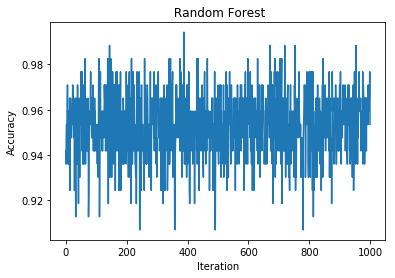

0.9534883720930233
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [30]:
accuracy = []
x_range = []
for j in range(1000):
    x_range.append(j)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = RandomForestClassifier(n_estimators=20, criterion='gini', min_samples_split=2,max_features='auto')
    clf.fit(X_train,y_train)
    acc = clf.score(X_test,y_test)
    accuracy.append(acc)
plt.title(' Random Forest')
plt.plot(x_range, accuracy)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.show()
print(acc)

test_label = np.array(cancer_ds['Biopsy'])

clf = RandomForestClassifier(n_estimators=20, criterion='gini', min_samples_split=2,max_features='auto')
clf.fit(X_train,y_train)

predictions = clf.predict(X_test)
print(predictions)
print(y_test)

df_ans = pd.DataFrame({'Biopsy' :y_test})
df_ans['predictions'] = predictions

In [31]:
df_ans

,Biopsy,predictions
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [32]:
df_ans[ df_ans['Biopsy'] != df_ans['predictions'] ]

,Biopsy,predictions
22,1,0
30,1,0
62,1,0
67,1,0
93,0,1
136,0,1


8
4
2
158
total test case number:  172


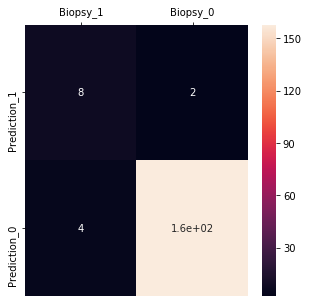

In [33]:
cols = ['Biopsy_1','Biopsy_0']  #Gold standard
rows = ['Prediction_1','Prediction_0'] #diagnostic tool (our prediction)

B1P1 = len(df_ans[(df_ans['predictions'] == df_ans['Biopsy']) & (df_ans['Biopsy'] == 1)])
B1P0 = len(df_ans[(df_ans['predictions'] != df_ans['Biopsy']) & (df_ans['Biopsy'] == 1)])
B0P1 = len(df_ans[(df_ans['predictions'] != df_ans['Biopsy']) & (df_ans['Biopsy'] == 0)])
B0P0 = len(df_ans[(df_ans['predictions'] == df_ans['Biopsy']) & (df_ans['Biopsy'] == 0)])

print(B1P1)
print(B1P0)
print(B0P1)
print(B0P0)


conf = np.array([[B1P1,B0P1],[B1P0,B0P0]])
ds_cm = pd.DataFrame(conf, columns = [i for i in cols], index = [i for i in rows])

f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(ds_cm, annot=True, ax=ax) 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.

print('total test case number: ', np.sum(conf))

In [34]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) 
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

model_efficacy(conf)

total_num:  172
G1P1:  8
G0P1:  2
G1P0:  4
G0P0:  158
##########################
sensitivity:  0.6666666666666666
specificity:  0.9753086419753086
false_positive_rate:  0.0125
false_negative_rate:  0.3333333333333333


(172, 0.6666666666666666, 0.9753086419753086, 0.0125, 0.3333333333333333)